In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import fnmatch
import matplotlib.pyplot as plt

import keras
from keras.layers import LeakyReLU, UpSampling1D, Input, Reshape, Activation, Lambda, AveragePooling1D
from keras.layers import Convolution2D, Dense, MaxPooling2D, Flatten, BatchNormalization, Dropout, Conv2DTranspose
from keras.models import Sequential
from keras.optimizers import RMSprop
import random
from PIL import Image
import cv2
from keras.layers.merge import concatenate
import csv;
from keras.layers import merge, Convolution2D, MaxPooling2D, Input, Dense, Flatten
from keras.models import Model
from hw4_tools import *
# From pypng
import png
#from sklearn.p
from sklearn.model_selection import cross_val_score
from sklearn.base import clone

from sklearn.svm.libsvm import cross_validation

import copy

FONTSIZE = 18
FIGURE_SIZE = (10,4)
FIGURE_SIZE2 = (10,10)

# Configure parameters
plt.rcParams.update({'font.size': FONTSIZE})

####################################
# 
import re

##################
# Default tick label size
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24

from hw4_tools import *

Using TensorFlow backend.


## Reading path from CSV

In [2]:
def Fetch_images(filepath):
    ls = [];
    i_pos=[];
    i_neg=[];
    
    with open(filepath) as csvfile:
        readCSV = csv.reader(csvfile, delimiter=',')
        for row in readCSV:
            ls.append(row[0]);
    
    for i in range(0, len(ls)):
        ls[i]='/home2/bank0014/project_data/'+ls[i]
    
    for i in range(0,len(ls)):
        if((ls[i].find('positive'))>0):
            i_pos.append(ls[i])
        else:
            i_neg.append(ls[i])

    df_pos= pd.DataFrame({'path':i_pos})
    df_neg= pd.DataFrame({'path':i_neg})
    
    return df_pos, df_neg


### Function which fetches specified number of images from file for each category

In [2]:

def Fetch_images(filepath,n):
    ls = [];
    i_pos=[];
    i_neg=[];
    '''shoulder=[];
    wrist=[];
    hand=[];
    finger=[];
    forearm=[];
    humerus=[];
    elbow=[];'''
    
    S_kp=0;
    S_kn=0;
    
    E_kp=0;
    E_kn=0;
    
    F_kp=0;
    F_kn=0;
    
    Fr_kp=0;
    Fr_kn=0;
    
    H_kp=0;
    H_kn=0;
    
    Hr_kp=0;
    Hr_kn=0;
    
    W_kp=0;
    W_kn=0;
    
    with open(filepath) as csvfile:
        readCSV = csv.reader(csvfile, delimiter=',')
        for row in readCSV:
            ls.append(row[0]);
    
    for i in range(0, len(ls)):
        ls[i]='/home2/bank0014/project_data/'+ls[i]
    
    for i in range(0,len(ls)):
        if((ls[i].find('ELBOW'))>0):
            if((ls[i].find('positive'))>0):
                if(E_kp<=n):
                    i_pos.append(ls[i])
                    #elbow.append(ls[i])
                    E_kp=E_kp+1
            else:
                if(E_kn<=n):
                    i_neg.append(ls[i])
                    #elbow.append(ls[i])
                    E_kn=E_kn+1
                    
        elif((ls[i].find('FOREARM'))>0):
            if((ls[i].find('positive'))>0):
                if(Fr_kp<=n):
                    i_pos.append(ls[i])
                    #forearm.append(ls[i])
                    Fr_kp=Fr_kp+1
            else:
                if(Fr_kn<=n):
                    i_neg.append(ls[i])
                    #forearm.append(ls[i])
                    Fr_kn=Fr_kn+1
    
        elif((ls[i].find('FINGER'))>0):
            if((ls[i].find('positive'))>0):
                if(F_kp<=n):
                    i_pos.append(ls[i])
                    #finger.append(ls[i])
                    F_kp=F_kp+1
            else:
                if(F_kn<=n):
                    i_neg.append(ls[i])
                    #finger.append(ls[i])
                    F_kn=F_kn+1

        elif((ls[i].find('HAND'))>0):
            if((ls[i].find('positive'))>0):
                if(H_kp<=n):
                    i_pos.append(ls[i])
                    #hand.append(ls[i])
                    H_kp=H_kp+1
            else:
                if(H_kn<=n):
                    i_neg.append(ls[i])
                    #hand.append(ls[i])
                    H_kn=H_kn+1

        elif((ls[i].find('SHOULDER'))>0):
            if((ls[i].find('positive'))>0):
                if(S_kp<=n):
                    i_pos.append(ls[i])
                    #shoulder.append(ls[i])
                    S_kp=S_kp+1
            else:
                if(S_kn<=n):
                    i_neg.append(ls[i])
                    #shoulder.append(ls[i])
                    S_kn=S_kn+1
                
        
        elif((ls[i].find('WRIST'))>0):
            if((ls[i].find('positive'))>0):
                if(W_kp<=n):
                    i_pos.append(ls[i])
                    #wrist.append(ls[i])
                    W_kp=W_kp+1
            else:
                if(W_kn<=n):
                    i_neg.append(ls[i])
                    #wrist.append(ls[i])
                    W_kn=W_kn+1
        

                
        elif((ls[i].find('HUMERUS'))>0):
            if((ls[i].find('positive'))>0):
                if(Hr_kp<=n):
                    i_pos.append(ls[i])
                    #humerus.append(ls[i])
                    Hr_kp=Hr_kp+1
            else:
                if(Hr_kn<=n):
                    i_neg.append(ls[i])
                    #humerus.append(ls[i])
                    Hr_kn=Hr_kn+1
                    
        

    df_pos= pd.DataFrame({'path':i_pos})
    df_neg= pd.DataFrame({'path':i_neg})
    
    return df_pos, df_neg


In [3]:
val_pos, val_neg=Fetch_images('/home2/bank0014/project_data/MURA-v1.1/valid_image_paths.csv',70)
tr_pos, tr_neg=Fetch_images('/home2/bank0014/project_data/MURA-v1.1/train_image_paths.csv',600)

## Reading Images:

In [7]:
def read_images(df_pos,df_neg,data_range_pos,data_range_neg):
    img_pos=[];
    img_neg=[];
    for i in range(0,data_range_pos):
        img_pos.append(cv2.imread(df_pos.path[i]))
    
    for j in range(0, data_range_neg):
        img_neg.append(cv2.imread(df_neg.path[j]))
    
    return img_pos, img_neg

In [8]:
val_im_pos, val_im_neg=read_images(val_pos, val_neg,len(val_pos), len(val_neg))
tr_im_pos, tr_im_neg=read_images(tr_pos, tr_neg,len(tr_pos), len(tr_neg))

In [27]:
val_im_pos, val_im_neg=read_images(val_pos, val_neg,50,50)
tr_im_pos, tr_im_neg=read_images(tr_pos, tr_neg,100,100)

# Reshaping Images

In [9]:
def reshape_images(img_poss):
    for i in range(0,len(img_poss)):
        img_poss[i]=cv2.resize(src=img_poss[i],dsize=(224,224))
        #print (img_pos[i].shape)
        img_poss[i]=np.array(img_poss[i])
        #print (img_pos[i].shape)
        img_poss[i]=img_poss[i]/255.
    return img_poss

In [10]:
val_im_pos=reshape_images(val_im_pos)
val_im_neg=reshape_images(val_im_neg)

tr_im_pos=reshape_images(tr_im_pos)
tr_im_neg=reshape_images(tr_im_neg)

list

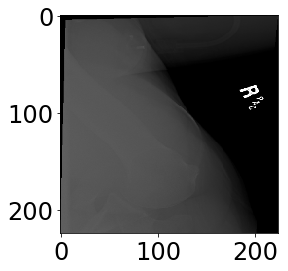

In [30]:
plt.imshow(tr_im_neg[19])
type(tr_im_neg)

In [11]:
import numpy as np
val_im_pos=np.array(val_im_pos)
val_im_neg=np.array(val_im_neg)

tr_im_pos=np.array(tr_im_pos)
tr_im_neg=np.array(tr_im_neg)

(224, 224, 3)

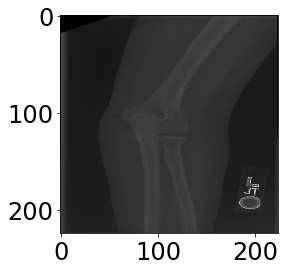

In [9]:
plt.imshow(tr_im_neg[99])
tr_im_neg[99].shape

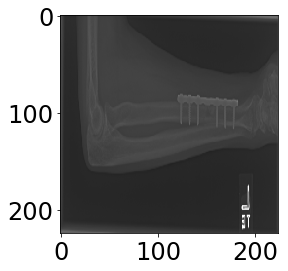

In [33]:
plt.imshow(val_im_pos[103])

## Labeling:

In [12]:
val_outs_pos = np.ones(val_im_pos.shape[0])
val_outs_neg = np.zeros(val_im_neg.shape[0])

tr_outs_pos = np.ones(tr_im_pos.shape[0])
tr_outs_neg = np.zeros(tr_im_neg.shape[0])

In [17]:
'''len(val_outs_pos)
len(tr_outs_neg)
len(tr_outs_pos)'''
#val-381+385
#tr-2667+4089
len(val_ins)

1414

In [13]:
val_ins = np.append(val_im_pos, val_im_neg, axis=0)
val_outs = np.append(val_outs_pos, val_outs_neg, axis=0)

tr_ins= np.append(tr_im_pos, tr_im_neg, axis=0)
tr_outs = np.append(tr_outs_pos, tr_outs_neg, axis=0)

## Create a model

In [36]:
def construct_model(input_shape, lambda_regularization=0):
    lambda_regularization=0
    visible = Input(shape=(224,224,3))
    x = Convolution2D(filters=10,
                           kernel_size=(3,3),
                           #input_shape=ins_A.shape,
                           strides=(3,3),
                           padding='same',
                           use_bias = True,
                           kernel_initializer='random_uniform',
                           bias_initializer='random_uniform',
                           kernel_regularizer=keras.regularizers.l2(lambda_regularization),
                   bias_regularizer=keras.regularizers.l2(lambda_regularization),
                           activation='elu',name='c01')(visible)
    x = Convolution2D(filters=8,
                           kernel_size=(3,3),
                           strides=(1,1),
                           padding='same',
                           use_bias = True,
                           kernel_initializer='random_uniform',
                           bias_initializer='random_uniform',
                           kernel_regularizer=keras.regularizers.l2(lambda_regularization),
                   bias_regularizer=keras.regularizers.l2(lambda_regularization),
                           activation='elu',name='c011')(x)
    '''x = Convolution2D(filters=4,
                           kernel_size=(3,3),
                           strides=(1,1),
                           padding='same',
                           use_bias = True,
                           kernel_initializer='random_uniform',
                           bias_initializer='random_uniform',
                           kernel_regularizer=keras.regularizers.l2(lambda_regularization),
                   bias_regularizer=keras.regularizers.l2(lambda_regularization),
                           activation='elu',name='c012')(x)'''
    x = MaxPooling2D((2, 2), strides=(1,1))(x)
    x = Flatten()(x)

    # the first branch operates on the first input
    x = Dense(16, activation="elu")(x)
    x = Dense(4, activation="elu")(x)
    #x = Model(inputs=ins_A, outputs=x)
    x= Model(inputs=visible, outputs=x)
    

    y = Convolution2D(filters=10,
                           kernel_size=(3,3),
                           strides=(3,3),
                           padding='same',
                           use_bias = True,
                           kernel_initializer='random_uniform',
                           bias_initializer='random_uniform',
                           kernel_regularizer=keras.regularizers.l2(lambda_regularization),
                   bias_regularizer=keras.regularizers.l2(lambda_regularization),
                           activation='elu',name='c0111')(visible)
    y = Convolution2D(filters=8,
                           kernel_size=(3,3),
                           strides=(1,1),
                           padding='same',
                           use_bias = True,
                           kernel_initializer='random_uniform',
                           bias_initializer='random_uniform',
                           kernel_regularizer=keras.regularizers.l2(lambda_regularization),
                   bias_regularizer=keras.regularizers.l2(lambda_regularization),
                           activation='elu',name='c01111')(y)
    '''y = Convolution2D(filters=4,
                           kernel_size=(3,3),
                           strides=(1,1),
                           padding='same',
                           use_bias = True,
                           kernel_initializer='random_uniform',
                           bias_initializer='random_uniform',
                           kernel_regularizer=keras.regularizers.l2(lambda_regularization),
                   bias_regularizer=keras.regularizers.l2(lambda_regularization),
                           activation='elu',name='c01112')(y)'''
    y = MaxPooling2D((2, 2), strides=(1,1))(y)
    y = Flatten()(y)

    # the second branch opreates on the second input
    y = Dense(16, activation="elu")(y)
    y = Dense(4, activation="elu")(y)
    y = Model(inputs=visible, outputs=y)
 
    # combine the output of the two branches
    combined = concatenate([x.output, y.output])
 
    # apply a FC layer and then a regression prediction on the
    # combined outputs
    z = Dense(2, activation="elu")(combined)
    z = Dense(1, activation="sigmoid")(z)
 
    # our model will accept the inputs of the two branches and
    # then output a single value
    model = Model(inputs=visible, outputs=z)
    
    opt = keras.optimizers.Adam(lr=0.00001, beta_1=0.9, beta_2=0.999, 
                                  epsilon=None, decay=0.0, amsgrad=False)

    model.compile(loss='binary_crossentropy', optimizer=opt, 
                  metrics=['accuracy'])
    print(model.summary())
    return model

In [37]:
model = construct_model(tr_ins.shape[1:], 0.001)

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
c01 (Conv2D)                    (None, 75, 75, 10)   280         input_2[0][0]                    
__________________________________________________________________________________________________
c0111 (Conv2D)                  (None, 75, 75, 10)   280         input_2[0][0]                    
__________________________________________________________________________________________________
c011 (Conv2D)                   (None, 75, 75, 8)    728         c01[0][0]                        
__________________________________________________________________________________________________
c01111 (Co

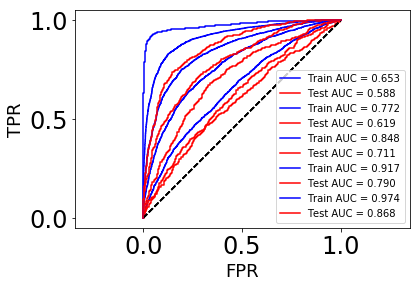

In [16]:
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
X=tr_ins
Y=tr_outs
for train, test in kfold.split(X,Y):
    # Fit the model
    Y=tr_outs
    model.fit(X[train], Y[train], epochs=5, batch_size=10, verbose=0)
    # evaluate the model
    #scores = model.evaluate(X[test], Y[test], verbose=0)
    generate_roc(model, X[train], Y[train], X[test], Y[test])
    #print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    #cvscores.append(scores[1] * 100)
    #print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

In [38]:
model.fit(x=tr_ins, y=tr_outs, epochs=20)

Epoch 1/20
8412/8412 [==============================] - 143s 17ms/step - loss: 0.6945 - acc: 0.4993
Epoch 2/20
8412/8412 [==============================] - 135s 16ms/step - loss: 0.6936 - acc: 0.5113
Epoch 3/20
8412/8412 [==============================] - 136s 16ms/step - loss: 0.6920 - acc: 0.5257
Epoch 4/20
8412/8412 [==============================] - 145s 17ms/step - loss: 0.6905 - acc: 0.5259
Epoch 5/20
8412/8412 [==============================] - 136s 16ms/step - loss: 0.6869 - acc: 0.5503
Epoch 6/20
8412/8412 [==============================] - 139s 17ms/step - loss: 0.6829 - acc: 0.5540
Epoch 7/20
8412/8412 [==============================] - 135s 16ms/step - loss: 0.6806 - acc: 0.5626
Epoch 8/20
8412/8412 [==============================] - 94s 11ms/step - loss: 0.6791 - acc: 0.5672
Epoch 9/20
8412/8412 [==============================] - 70s 8ms/step - loss: 0.6779 - acc: 0.5688
Epoch 10/20
8412/8412 [==============================] - 68s 8ms/step - loss: 0.6759 - acc: 0.5706
Epoc

In [14]:
predicted = model.predict(tr_ins[50:700])

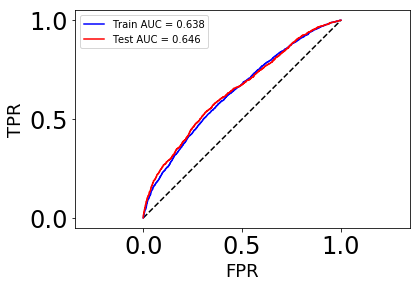

In [39]:
generate_roc(model, tr_ins, tr_outs, tr_ins[2000:6500], tr_outs[2000:6500])

# Testing

In [40]:
predict = model.predict(val_ins[0:601])

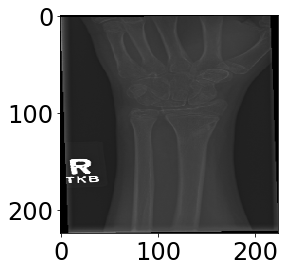

In [19]:
plt.imshow(val_im_pos[2])

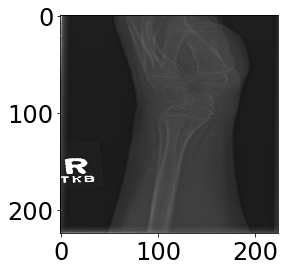

In [32]:
plt.imshow(val_im_pos[3])

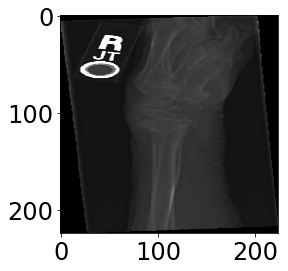

In [33]:
plt.imshow(val_im_pos[4])

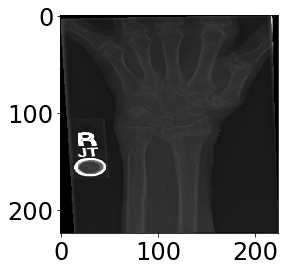

In [34]:
plt.imshow(val_im_pos[5])

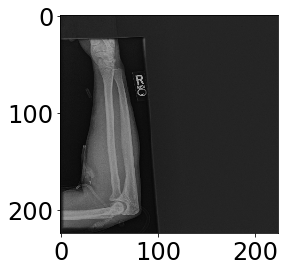

In [23]:
plt.imshow(val_im_neg[100])

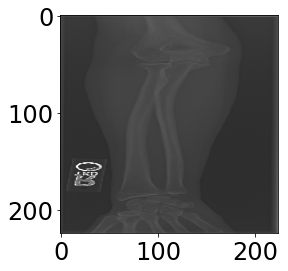

In [24]:
plt.imshow(val_im_neg[101])

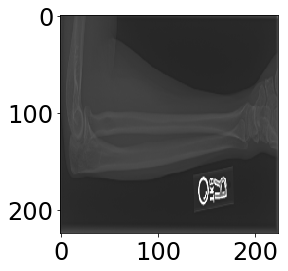

In [25]:
plt.imshow(val_im_neg[102])

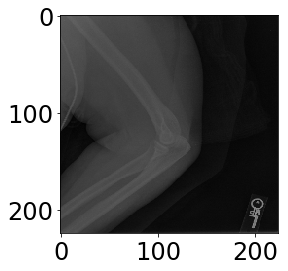

In [26]:
plt.imshow(val_im_neg[103])

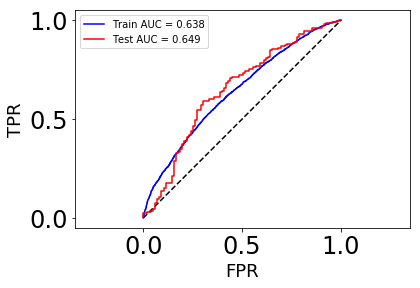

In [42]:
from hw4_tools import *
generate_roc(model, tr_ins, tr_outs, val_ins[200:600], val_outs[200:600])